In [6]:
import numpy as np
import scipy.optimize as sp

In [32]:
def f(x):
    return (x[0]-3)**2+(x[1]-4)**2

## Apprendre à utiliser minimize

In [33]:
sp.minimize(f,[0,0])

      fun: 2.1882487526356894e-14
 hess_inv: array([[ 0.81999998, -0.24      ],
       [-0.24      ,  0.68000002]])
      jac: array([-2.27356026e-07,  1.84728737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([2.99999988, 4.00000008])

## Apprendre à Implémenter une Descente de Gradient

In [34]:
def df(x):
    x1 = 2*(x[0]-3)
    x2 = 2*(x[1]-4)
    return np.array([x1,x2])

#Gradient Descent algorithm
def GradDescent(df,alpha,iterations):
    x = np.array([0,0])
    for i in range(iterations):
        grad = df(x)
        x = x - alpha*grad
    return x
    
alpha = 0.1
iterations = 100
x_opt = GradDescent(df,alpha,iterations)
x_opt

array([3., 4.])

## Régression Linéaire Simple

In [35]:
import pandas as pd

df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [36]:
x = df['TV'].values
y = df['Sales'].values

In [37]:
x_mean = x.mean()
x_std = x.std()
x_normalized = (x - x_mean) / x_std

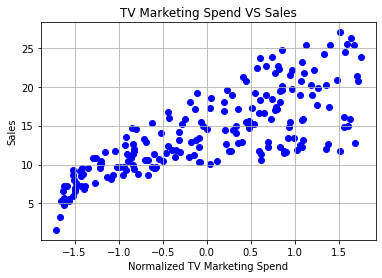

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x_normalized,y,color = 'blue')
plt.title('TV Marketing Spend VS Sales')
plt.xlabel('Normalized TV Marketing Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [39]:
def prediction(x,tab):
    w0,w1 = tab
    return w0 + w1*x

def erreurQuadratique(tab,x,y):
    predictions = prediction(x,tab)
    return np.mean((y - predictions)**2)

initial_params = np.array([0,0])
result = sp.minimize(erreurQuadratique, initial_params, args = (x_normalized,y))
print(result)
w0_opt, w1_opt = result.x

      fun: 10.51265291565942
 hess_inv: array([[ 0.53886684, -0.13387593],
       [-0.13387593,  0.96113321]])
      jac: array([2.26497650e-06, 2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([14.02250116,  4.07100727])


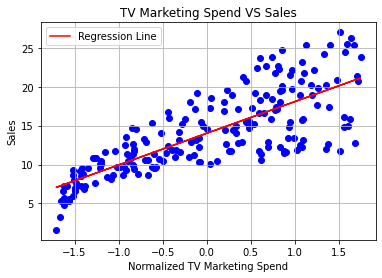

In [40]:
plt.scatter(x_normalized,y,color = 'blue')
plt.plot(x_normalized, prediction(x_normalized, [w0_opt, w1_opt]), color = 'red', label = 'Regression Line')
plt.title('TV Marketing Spend VS Sales')
plt.xlabel('Normalized TV Marketing Spend')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def derreurQuadratique(x):
    